### Web Cam Calibration for Sepecific Camera models belonging to MobileX Station

#### w:50cm, d:50cm, 보드 사각형의 크기

In [13]:
import cv2
import time  # 지연을 위해 time 모듈을 임포트합니다.

def capture_image_from_webcam(filename='1m_1.jpg'):
    cap = cv2.VideoCapture(0)  # 웹캠 인덱스 조정

    if not cap.isOpened():
        print("Error: 웹캠을 열 수 없습니다.")
        return

    time.sleep(2)  # 웹캠이 완전히 초기화될 시간을 줍니다.

    ret, frame = cap.read()
    if not ret:
        print("Error: 프레임을 읽을 수 없습니다.")
    else:
        cv2.imwrite(filename, frame)
        print(f"{filename}으로 이미지가 저장되었습니다.")

    cap.release()

if __name__ == "__main__":
    capture_image_from_webcam()


[ WARN:0@588.685] global /private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_11nitadzeg/croot/opencv-suite_1691620374638/work/modules/videoio/src/cap_gstreamer.cpp (862) isPipelinePlaying OpenCV | GStreamer warning: GStreamer: pipeline have not been created


1m_1.jpg으로 이미지가 저장되었습니다.


이 방법은 대상의 실제크기를 알 수 있을 때만 사용가능하다. -> 이거 자체는 사실 걍 실제크기만 알면 바로 되긴함.

모르면 못 함.

ex) 170인 사람이 이정도 칸 에 꽉차면 5미터다

그래서 monocular depth estimation을 사용할 예정.

이 데이터셋은 해당 모델이 정확한지 알아보기 위험으로 쓰자.

+) 정확도 개판인데..?

그럼 생각해야할 것.

1. "누구인지" 가 매우 중요해졌다.
2. 바운딩 박스를 robust하게 만들어볼 수 있다면..

# Monocular depth estimation

In [1]:
pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 373.8 kB/s eta 0:00:001m427.2 kB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.8/114.8 kB 1.9 MB/s eta 0:00:002.5 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 8.2 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 20.0 MB/s eta 0:00:00 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 291.0/291.0 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.4/393.4 kB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 27.8 MB/s eta 0:00:0031m33.1 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━

In [8]:
conda install tensorflow

Channels:
 - defaults
 - pytorch
Platform: osx-arm64

\ Retrying (Retry(total=1, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x10b0dba50>, 'Connection to repo.anaconda.com timed out. (connect timeout=9.15)')': /pkgs/r/noarch/repodata.json

done
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
from transformers import pipeline
checkpoint = "vinvino02/glpn-nyu"
depth_estimator = pipeline("depth-estimation", model=checkpoint)

model.safetensors: 100%|███████████████████████████████████████████████████████████████| 245M/245M [00:15<00:00, 15.9MB/s]
preprocessor_config.json: 100%|███████████████████████████████████████████████████████████| 137/137 [00:00<00:00, 212kB/s]
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


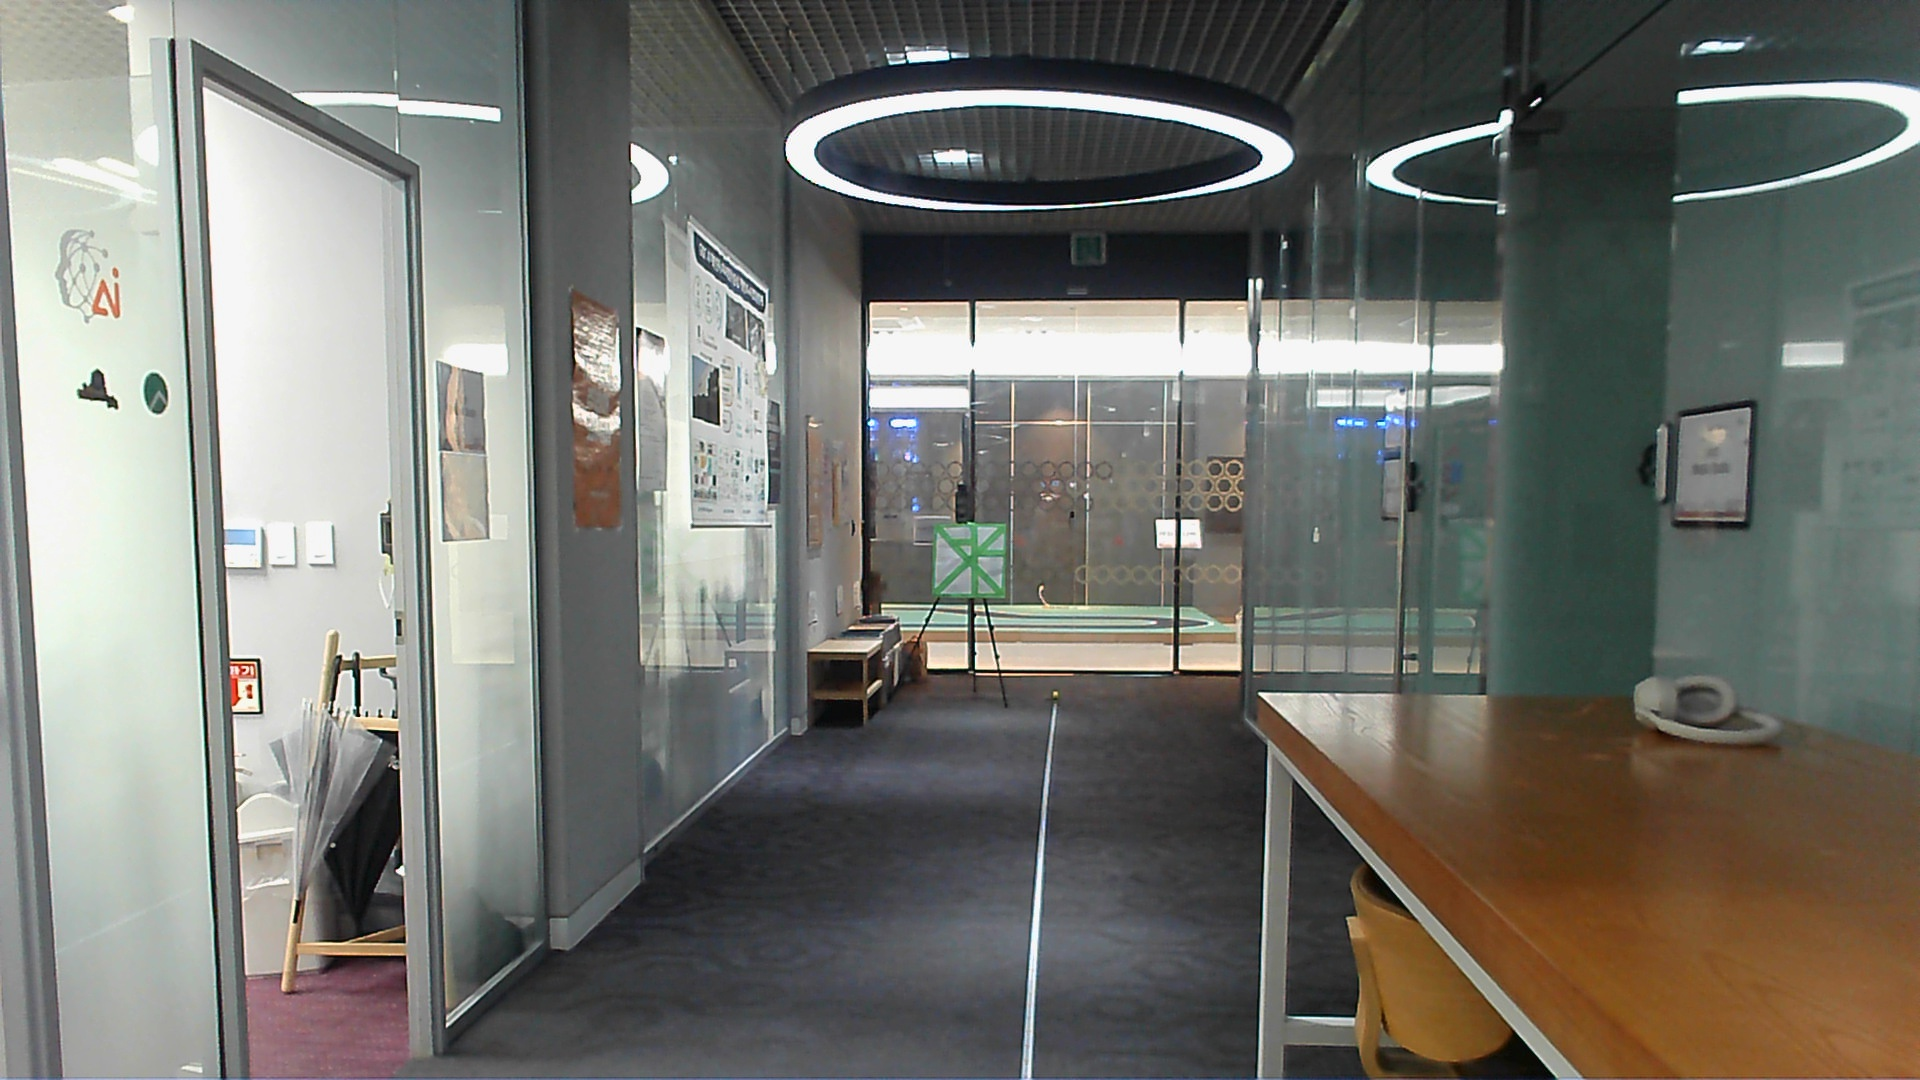

In [65]:
from PIL import Image
import requests

# url = "https://unsplash.com/photos/HwBAsSbPBDU/download?ixid=MnwxMjA3fDB8MXxzZWFyY2h8MzR8fGNhciUyMGluJTIwdGhlJTIwc3RyZWV0fGVufDB8MHx8fDE2Nzg5MDEwODg&force=true&w=640"
# image = Image.open(requests.get(url, stream=True).raw)

image_path = "10m_2.jpg"

# 이미지 열기
image = Image.open(image_path)
image

In [66]:
predictions = depth_estimator(image)

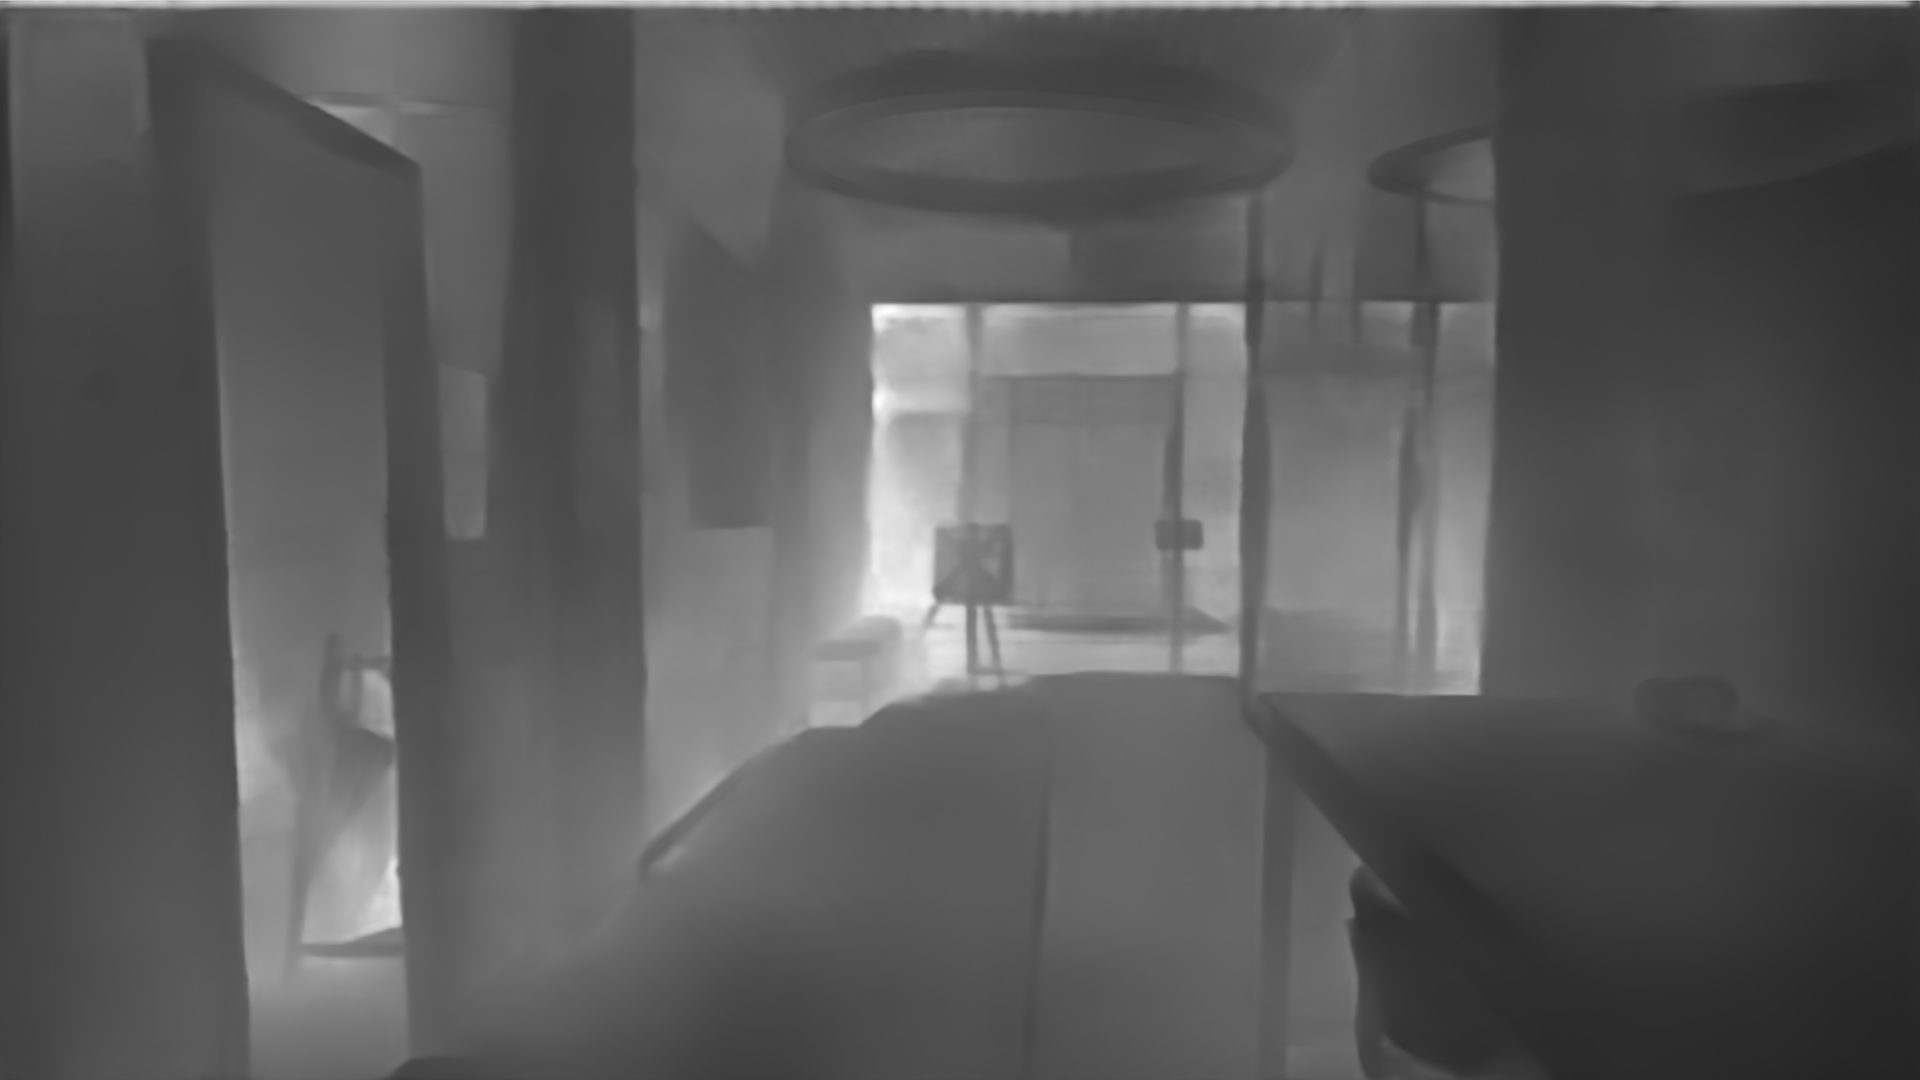

In [67]:
predictions["depth"]

In [68]:
print(predictions)

{'predicted_depth': tensor([[[4.2425, 4.0396, 4.1853,  ..., 3.4404, 3.4799, 3.9812],
         [3.2343, 2.8523, 2.8324,  ..., 1.4507, 1.5060, 2.0681],
         [3.3015, 3.2530, 3.3492,  ..., 1.9172, 1.9718, 2.0856],
         ...,
         [1.5702, 1.5793, 1.5676,  ..., 0.8735, 0.8846, 0.8561],
         [1.6086, 1.5041, 1.5503,  ..., 0.8543, 0.9480, 0.8156],
         [1.6727, 1.6143, 1.5063,  ..., 0.8490, 0.8988, 0.9459]]]), 'depth': <PIL.Image.Image image mode=L size=1920x1080 at 0x16571BFD0>}


In [79]:
import torch

# Assuming x, y are the coordinates of the pixel you're interested in
x, y = 980, 550

# Extract the depth value from the tensor
specific_pixel_depth = predictions['predicted_depth'][0][y][x].item()

print(f"The depth of the specific pixel at ({x}, {y}) is: {specific_pixel_depth} meters")


The depth of the specific pixel at (980, 550) is: 2.922797679901123 meters


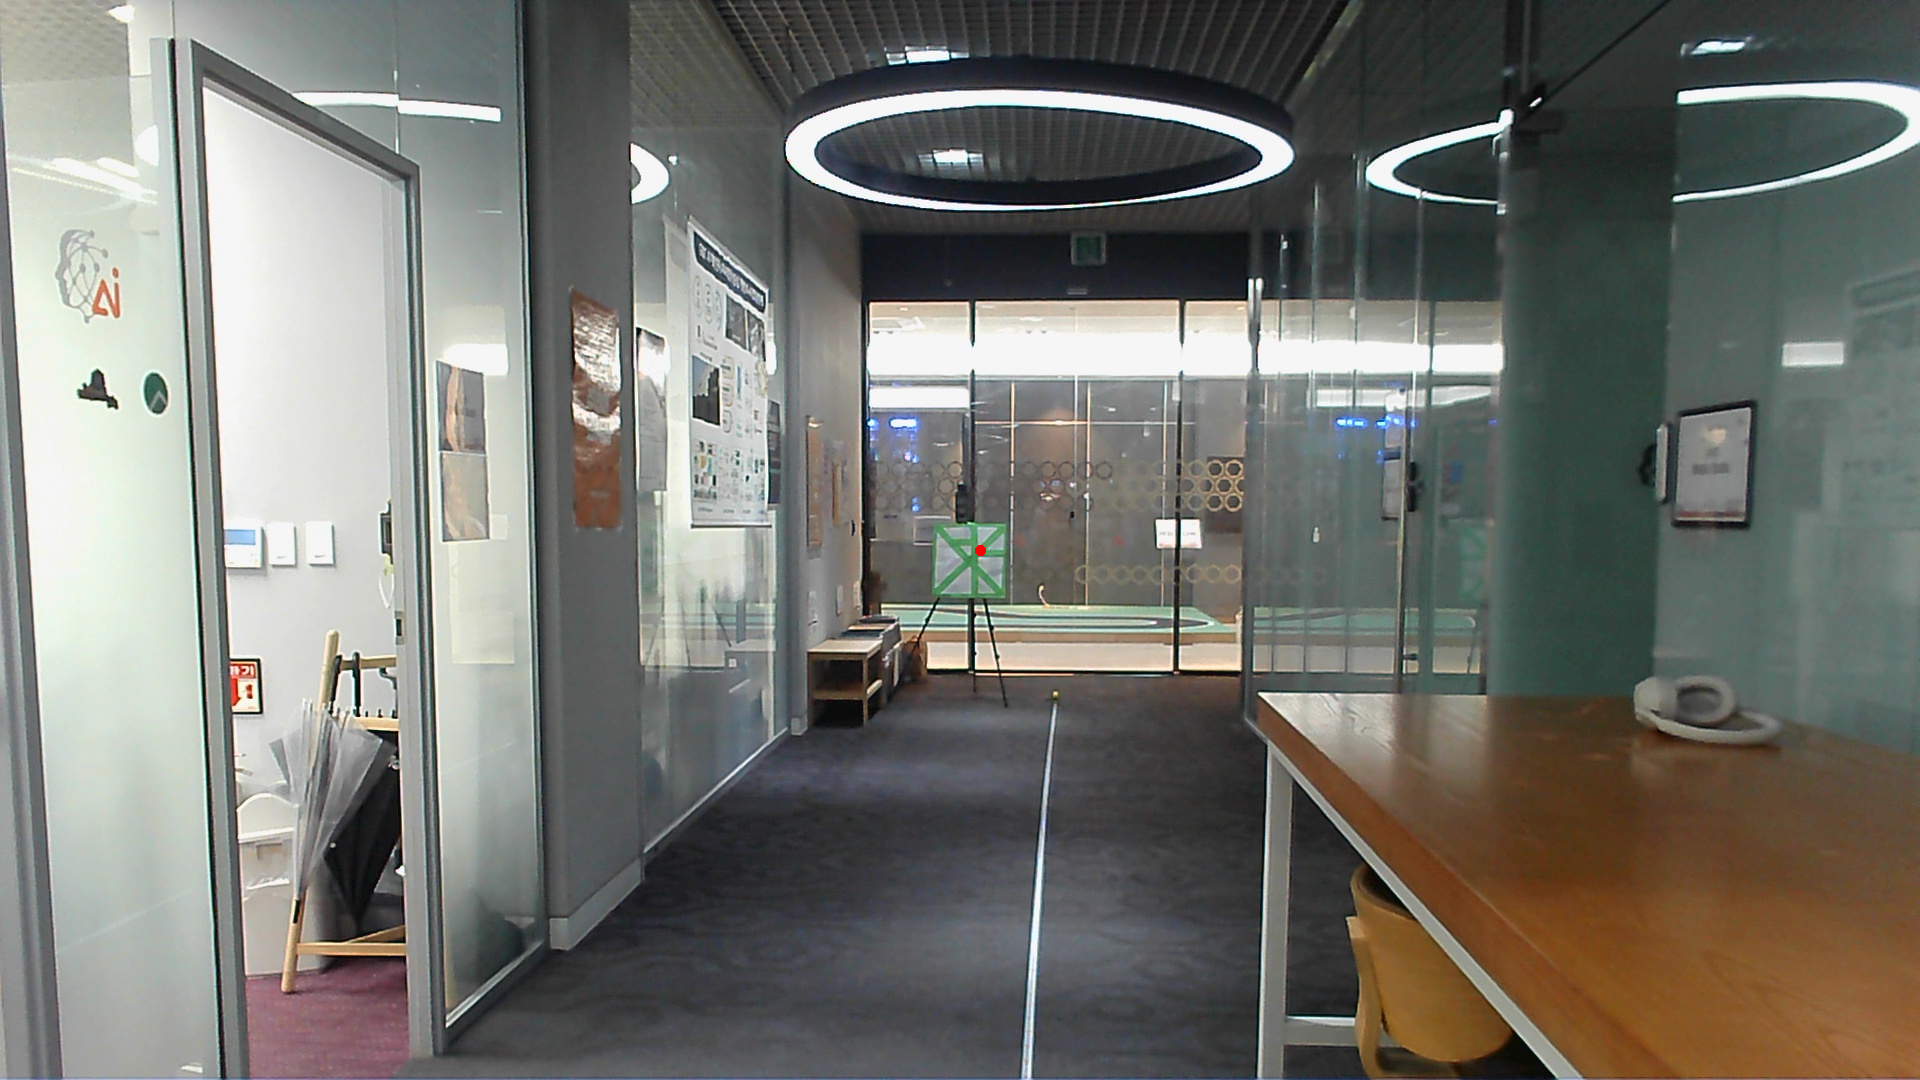

In [78]:
from PIL import Image, ImageDraw

image_path = "10m_2.jpg"  # Your local file path

# 이미지 열기
image = Image.open(image_path)

# 특정 픽셀 위치 설정
x, y = 980, 550  # 예시 좌표 

# 5m_2.jpg 기준 x 750 ~ 880, y 550 ~ 670

# 이미지에 점을 그림
draw = ImageDraw.Draw(image)
# (x, y) 위치에 원을 그려서 점을 표시 (가시성을 위해 원을 크게 그림)
draw.ellipse((x - 5, y - 5, x + 5, y + 5), fill='red')

# 수정된 이미지를 직접 보기
image


In [45]:

for y in range(550, 670):
    for x in range(750, 880):
    
        specific_pixel_depth = predictions['predicted_depth'][0][y][x].item()
        
        print(f"The depth of the specific pixel at ({x}, {y}) is: {specific_pixel_depth} meters")

The depth of the specific pixel at (750, 550) is: 2.2423758506774902 meters
The depth of the specific pixel at (751, 550) is: 2.2580103874206543 meters
The depth of the specific pixel at (752, 550) is: 2.2741811275482178 meters
The depth of the specific pixel at (753, 550) is: 2.295494556427002 meters
The depth of the specific pixel at (754, 550) is: 2.314290761947632 meters
The depth of the specific pixel at (755, 550) is: 2.325587749481201 meters
The depth of the specific pixel at (756, 550) is: 2.331550359725952 meters
The depth of the specific pixel at (757, 550) is: 2.328892707824707 meters
The depth of the specific pixel at (758, 550) is: 2.3280375003814697 meters
The depth of the specific pixel at (759, 550) is: 2.319524049758911 meters
The depth of the specific pixel at (760, 550) is: 2.2930941581726074 meters
The depth of the specific pixel at (761, 550) is: 2.245366334915161 meters
The depth of the specific pixel at (762, 550) is: 2.186976909637451 meters
The depth of the spe